In [1]:
## let's start with importing necessary libraries 
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB
import  matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"D:\Impact Batch\ML-Project-Diabetes-Prediction-Using-SVC-LogisticsRegression-and-Decision-Tree-Naive-Byese\Dataset\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()  ## all are numeric so no need to type convert 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
## as we can see clearly that Glucose	BloodPressure	SkinThickness	Insulin	BM all are minimum upto 0 which is not possible so change them with there mean value

def fill_mean(df):
    for i in df.columns :
        if i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
            print(i)
            df[i] = df[i].replace(0,df[i].mean())
    

In [7]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [8]:
df = fill_mean(data)

Glucose
BloodPressure
SkinThickness
Insulin
BMI


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

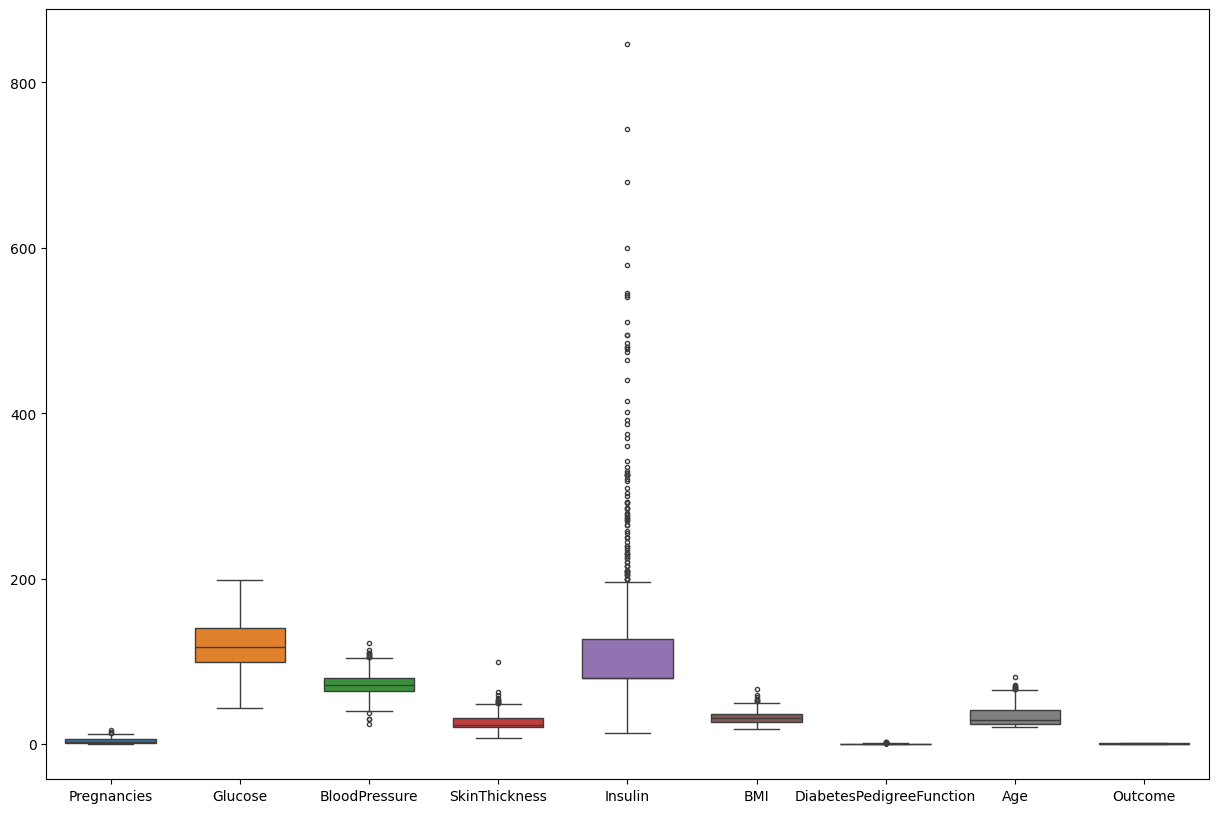

In [10]:
# now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns. 
plt.figure(figsize= (15,10))
sns.boxplot(data, width = 0.7,fliersize= 3)

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [12]:
X = data.drop(columns='Outcome')
y = data['Outcome']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 0)

In [14]:
import pickle 
scaler = pickle.load(open(r'D:\Impact Batch\ML-Project-Diabetes-Prediction-Using-SVC-LogisticsRegression-and-Decision-Tree-Naive-Byese\model\StandardScaler.pkl','rb'))

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled,X_test_scaled

(array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
         -0.98325882, -0.04863985],
        [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
         -0.62493647, -0.88246592],
        [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
          0.39884168, -0.5489355 ],
        ...,
        [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
         -0.96519215, -1.04923114],
        [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
         -0.5075031 ,  0.11812536],
        [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
          0.51627505,  2.953134  ]], shape=(576, 8)),
 array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
          2.78665365, -0.96584853],
        [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
         -0.19434743, -0.88246592],
        [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
         -0.23349189, -0.71570071],
        ...,
        [-0.82986389, -0.43304331, -1.

In [17]:
## Decision Tree Model Train With HYperParameter Tuning
import warnings
warnings.filterwarnings('ignore')

In [18]:
parameters = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
}

In [19]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

In [20]:
clf = GridSearchCV(estimator= classifier, param_grid= parameters,cv = 3, scoring= 'accuracy',verbose=3)

In [21]:
clf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.703 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, sco

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [22]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [23]:
y_pred = clf.predict(X_test_scaled)

In [24]:
accuracy_score(y_pred,y_test)

0.6875

In [25]:
classifier = DecisionTreeClassifier(criterion= 'entropy',max_depth=5 ,max_features='sqrt',splitter= 'random')

In [26]:
classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       splitter='random')

In [27]:
y_pred = classifier.predict(X_test_scaled)

In [28]:
accuracy_score(y_test,y_pred)

0.6510416666666666

In [29]:
conf_mat = confusion_matrix(y_test,y_pred)

In [30]:
True_positive = conf_mat[0][0]
True_negative = conf_mat[1][1]
False_positive = conf_mat[0][1]
False_negative = conf_mat[1][0]

In [31]:
accuracy = (True_negative+ True_positive )/ (True_positive+ True_negative+ False_negative+ False_positive)
print(accuracy)

0.6510416666666666


In [32]:
precision  = (True_positive) /(True_positive + False_positive)
precision

np.float64(0.6923076923076923)

In [33]:
recall = (True_positive) / (True_positive + False_negative)
recall 

np.float64(0.7692307692307693)

In [34]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.5109489051094891

In [35]:
F1_score = 2*(recall*precision)/(recall + precision)
F1_score

np.float64(0.728744939271255)

In [36]:
## as we see clearly that accuracy and F1_score of Decison Tree Classifier is less than that of Logistic Regression so i don't dump it as 
## an pickle file cause we already have better option than this

In [37]:
## Now let's try with Support Vector Classfier if it have higher accuracy

In [38]:
## Support Vector Classifier with Hyperparameter Tuning

# defining parameter range
param_grid = {
    'C' : [1,0.1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear','rbf','poly']
} 

In [39]:
grid = GridSearchCV(estimator= SVC(),param_grid=param_grid,cv = 3, verbose= 3,refit = True, scoring= 'accuracy')

In [41]:
## ok so grid don't abel ot compute well it takes too much time so let's now directly copy sir's parameter
## C : 0.1, 'gamma' :1, 'kernal' : 'linear'

In [43]:
svc_clf = SVC(C=0.1,gamma=1,kernel='linear')

In [44]:
svc_clf.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [46]:
## svc prediction
y_pred_svc = svc_clf.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred_svc)

0.7916666666666666

In [ ]:
confusion_matrix(y_test,y_pred_svc)    ## same as previous one so no need of this also we have best model that is logistic regression

array([[117,  13],
       [ 27,  35]])